In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.contrib.distributions import Bernoulli
import os
from PIL import Image
import keras
import keras.backend as K
import random
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from sklearn.preprocessing import normalize
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()





['/job:localhost/replica:0/task:0/device:GPU:0']

In [11]:
# import tensorflow as tf
from keras.datasets import mnist
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# x_train = normalize(x_train)
# x_test = normalize(x_test)


In [4]:
!nvidia-smi
# !kill -9 4639

Tue Jun 11 14:05:11 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 415.27       Driver Version: 415.27       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1060    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   65C    P2    28W /  N/A |    870MiB /  6078MiB |      7%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [12]:
model = Sequential()
#add model layers
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
# model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

# model.__dict__

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 284us/step - loss: 1.6336 - acc: 0.3992 - val_loss: 1.2791 - val_acc: 0.5374
Epoch 2/10
50000/50000 [==============================] - 14s 278us/step - loss: 1.2697 - acc: 0.5445 - val_loss: 1.0837 - val_acc: 0.6175
Epoch 3/10
50000/50000 [==============================] - 14s 277us/step - loss: 1.1365 - acc: 0.5950 - val_loss: 1.0027 - val_acc: 0.6412
Epoch 4/10
50000/50000 [==============================] - 14s 280us/step - loss: 1.0584 - acc: 0.6232 - val_loss: 0.9599 - val_acc: 0.6663
Epoch 5/10
50000/50000 [==============================] - 14s 277us/step - loss: 1.0041 - acc: 0.6460 - val_loss: 0.9394 - val_acc: 0.6659
Epoch 6/10
50000/50000 [==============================] - 14s 277us/step - loss: 0.9672 - acc: 0.6573 - val_loss: 0.8785 - val_acc: 0.6921
Epoch 7/10
50000/50000 [==============================] - 14s 281us/step - loss: 0.9288 - acc: 0.6712 - val_loss: 0.

[0.7414979082107543, 0.7475]

In [28]:
f = K.function([model.layers[0].input, K.learning_phase()],
               [model.layers[-1].output])

def predict_with_uncertainty(f, x, no_classes = 10, n_iter=100):
    result = np.zeros((n_iter,) + (x.shape[0], no_classes) )

    for i in range(n_iter):
        result[i,:, :] = f((x, 1))[0]

    prediction = result.mean(axis=0)
    uncertainty = result.std(axis=0)
    return prediction, uncertainty    

# from https://stackoverflow.com/questions/44971349/how-to-turn-off-dropout-for-testing-in-tensorflow/44971517

In [ ]:

# np.shape(uncertainty)

In [15]:
def imshow(image):
    image = image 
#     plt.imshow(img, )  # convert from Tensor image    
#     plt.imshow(np.squeeze(image), cmap='gray')  
    plt.imshow(image)

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

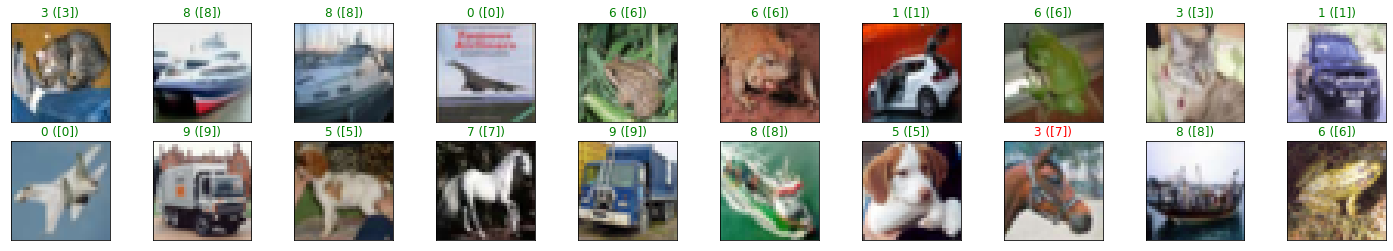

In [16]:
fig = plt.figure(figsize=(25, 4))
predict, uncertainty = predict_with_uncertainty(f, x_test[:20])

preds = [np.where(x == np.amax(x))[0][0] for x in predict]

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(x_test[idx])
#     actual = y_test[index]
    
    ax.set_title("{} ({})".format(preds[idx], y_test[idx]), color=("green" if preds[idx]==y_test[idx] else "red"))

label: 0 prob: 0.004364166921295692 uncertainty: 0.0071152348076720835
label: 1 prob: 0.0037100956344738732 uncertainty: 0.006849117926544789
label: 2 prob: 0.009821803656450356 uncertainty: 0.015307122734447346
label: 3 prob: 0.6154838360846042 uncertainty: 0.18258437539044609
label: 4 prob: 0.0021840694188017553 uncertainty: 0.003249035608885656
label: 5 prob: 0.16755150698125362 uncertainty: 0.13221139705379134
label: 6 prob: 0.12061514151049778 uncertainty: 0.12493390861133084
label: 7 prob: 0.009067707508293096 uncertainty: 0.014813517756806885
label: 8 prob: 0.06511442512268331 uncertainty: 0.11387053337186213
label: 9 prob: 0.0020872494640047988 uncertainty: 0.0031733936363328137


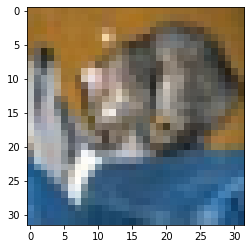

In [19]:
predict, uncertainty = predict_with_uncertainty(f, np.array([x_test[0]]))
imshow(x_test[0])
for i in range(10):
    print("label:" , i, "prob:", predict[0][i], "uncertainty:", uncertainty[0][i])

(32, 32, 3) (1,)
label: 0 prob: 0.012947563545985759 uncertainty: 0.034457123430111904
label: 1 prob: 0.006776680505515955 uncertainty: 0.015635627968112673
label: 2 prob: 0.020390032536924993 uncertainty: 0.022104760665184884
label: 3 prob: 0.04740733361730236 uncertainty: 0.04759018727053578
label: 4 prob: 0.2554685068805702 uncertainty: 0.22926878183622906
label: 5 prob: 0.005323783801521813 uncertainty: 0.009185271231788477
label: 6 prob: 0.29338146657537434 uncertainty: 0.28862158480863676
label: 7 prob: 0.049828122086455554 uncertainty: 0.08286184158598281
label: 8 prob: 0.022721575551613568 uncertainty: 0.04042921387743486
label: 9 prob: 0.28575492988340556 uncertainty: 0.27517023731033025
predicted: 6 ; value:  0.29338146657537434 ; uncertainty:  0.28862158480863676


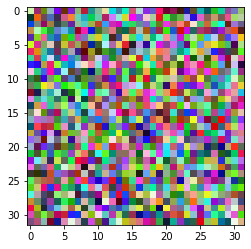

In [26]:
image = np.random.random((32,32,3))
label = np.random.randint(0,10, (1,))
print(np.shape(image), np.shape(label))

predict, uncertainty = predict_with_uncertainty(f, np.array([image]))

imshow(image)
for i in range(10):
    print("label:" , i, "prob:", predict[0][i], "uncertainty:", uncertainty[0][i])
    
print("predicted:", np.argmax(predict[0]), "; value: ", predict[0][np.argmax(predict[0])], "; uncertainty: ", uncertainty[0][np.argmax(predict[0])] )


In [56]:
well_classified = []
well_classified_uncertainty = []

wrong_classified = []
wrong_classified_uncertainty = []

prediction, uncertainty = predict_with_uncertainty(f, x_test)
for index, pred in enumerate(prediction):
    pred = np.argmax(pred)
    prediction[index] = pred
    unc = uncertainty[index][pred]
    uncertainty[index] = unc
    if pred == y_test[index]:
        well_classified.append(index)
        well_classified_uncertainty.append(unc)
    else:
        wrong_classified.append(index)
        wrong_classified_uncertainty.append(unc)




threshold = np.asarray(well_classified_uncertainty).mean() +  np.asarray(well_classified_uncertainty).std()

threshold


In [64]:
# import seaborn as sns

# # matplotlib histogram
# plt.hist(wrong_classified, color = 'blue', edgecolor = 'black',
#          bins = int(180))

# seaborn histogram
sns.distplot(wrong_classified_uncertainty, hist=True, kde=False,  color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of uncertainty distribution over wrongly classified data')
plt.xlabel('uncertainty')
plt.ylabel('number of misclassified images')
        

0.23836350661144884

In [ ]:
sns.distplot(well_classified_uncertainty, hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of uncertainty distribution over well classified data')
plt.xlabel('uncertainty')
plt.ylabel('number of classified images')

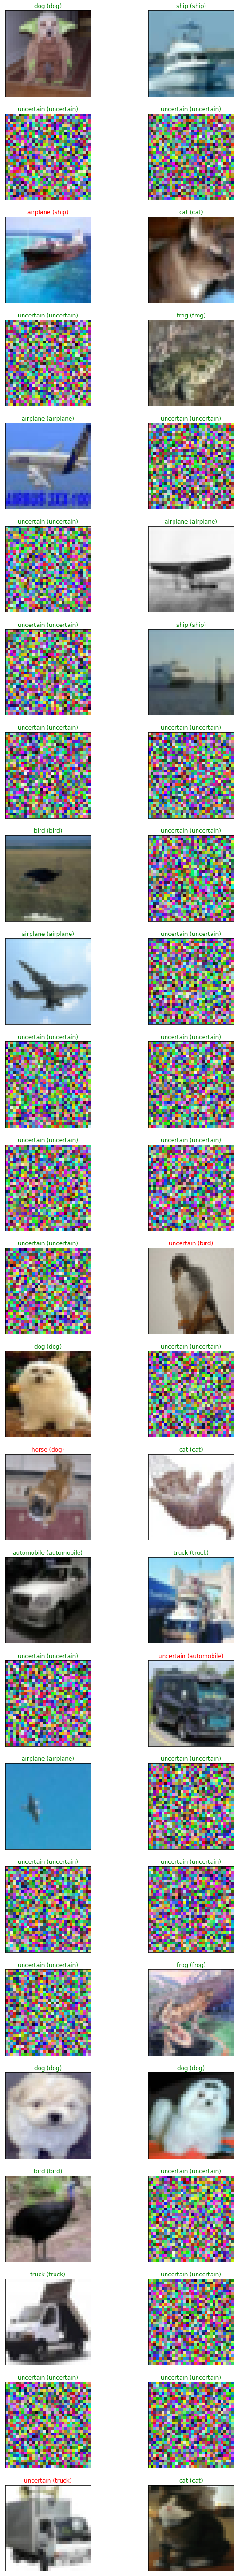

In [65]:
images = []
labels = []

for i in range(100):
    if bool(random.getrandbits(1)):
        images.append(np.random.random((32,32,3)))
        labels.append("uncertain")
    else:
        index =random.randint(0,10000)
        images.append(x_test[index])
        labels.append(classes[y_test[index][0]])

images = np.asarray(images)
labels = np.asarray(labels)
# print(np.shape(images), np.shape(labels))
predict, uncertainty = predict_with_uncertainty(f, images)
fig = plt.figure(figsize=(10, 100))

for idx in np.arange(50):
    ax = fig.add_subplot(25, 2, idx+1, xticks=[], yticks=[])
    pred = np.argmax(predict[idx])

    unc = uncertainty[idx][pred]
    if unc > threshold:
        label = "uncertain"
    else:
        label = classes[pred]
    imshow(images[idx])
#     ax.set_title("{} ".format(label))
    ax.set_title("{} ({})".format(label, labels[idx]), color=("green" if labels[idx]==label else "red"))